<a href="https://colab.research.google.com/github/SOUMYADEEP1805/HeartDiseasePrediction/blob/main/HeartProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


OBJECTIVES


1.   data processing
2.   variable wise data initialisation
3. data spliting
4. computes a summary of statistics pertaining to the DataFrame columns & print a concise summary of a DataFrame.
5. data visualisation and analyse using histogram visualization and decision making.
6. find data distribution between male & female
7. prediction on the basis of fasting blood suger.
8. prediction on the basis of age & sex vs target .
9.prediction on the basis of chest pain and age.
10.prediction on the basis of sex.
11. The distplot can be composed of all or any combination of the following 3 components −histogram, curve: (a) kernel density estimation or (b) normal curve, and rug plot. Here we have taken the output of thal column.
12. pair plot analysis.
13. Data processing
14. heatmap analysis
15. swamp plot prediction
16. violin plot prediction
17. Model making
18. decision tree model prediction.
19. prediction on the basis of KNN.
20. prediction on the basis of XGBOOST.
21. Final conclusion.




In [ ]:
import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [ ]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
heart=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")

In [ ]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Here we stored what column name means what in a variable info and then 
# printed it in front of its column name using the for loop function.
#  We can see the output below:-
info = ["age","1:male, 0:female","chest pain type, 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptotatic","resting blood pressure","serum cholestrol in mg/dl","fasting blood sugar > 120mg/dl","resting cardiographic results (values 0,1,2)", "maximum heart rate achieved","exercise induced angina","ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy"," 3= normal, 6= fixed defect, 7= reversable defect","having heart disease or not, 1: having, 0: not having"]
for i in range(len(info)):
    print(heart.columns[i]+":\t\t\t"+info[i])


age:			age
sex:			1:male, 0:female
cp:			chest pain type, 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptotatic
trestbps:			resting blood pressure
chol:			serum cholestrol in mg/dl
fbs:			fasting blood sugar > 120mg/dl
restecg:			resting cardiographic results (values 0,1,2)
thalach:			maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			 3= normal, 6= fixed defect, 7= reversable defect
target:			having heart disease or not, 1: having, 0: not having


In [ ]:
# Then we printed the target column of the heart file along which 
# we got its name, length and the data type of information of this column. 
heart['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
# groupby() function is used to split the data into groups based on some criteria. 
# size() function count the number of elements along a given axis.
# We have implied the groupby() and size() function on “target” column. 
# We can see it get didvided into 0 and 1 and also showed their respective sizes.
heart.groupby('target').size()

target
0    138
1    165
dtype: int64

In [ ]:
# The sum() function adds the items of an iterable and returns the sum.
# It will give the sum of all the value of sum in each column seen as below:-
heart.groupby('target').sum()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,7811,114,66,18547,34650,22,62,19196,76,218.8,161,161,351
1,8662,93,227,21335,39968,23,98,26147,23,96.2,263,60,350


In [ ]:
# The shape attribute for numpy arrays returns the dimensions of the array. 
# If Y has n rows and m columns, then Y. shape is (n,m). So heart file has 303 rows and 14 columns.
heart.shape

(303, 14)

In [ ]:
# The .size returns the total number of elements in an array.
# We can see that there are 4242 elemets in the heart file data.
heart.size

4242

In [ ]:
# The describe() function computes a summary of statistics pertaining to the DataFrame columns.
# This function gives the mean, std and IQR values.
# The function excludes the character columns and given summary about numeric columns.
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# The info() function is used to print a concise summary of a DataFrame.
# This method prints information about a DataFrame including the index dtype 
# and column dtypes, non-null values and memory usage.
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# unique() method is used to know all type of unique values in targeted column.
heart['target'].unique()

array([1, 0])

In [ ]:
# The hist() function in pyplot module of matplotlib library is used to plot a histogram.
#  The histogram() function is set to display cumulative distribution of values in successive bins.

# HISOGRAM VISUALIZATION 

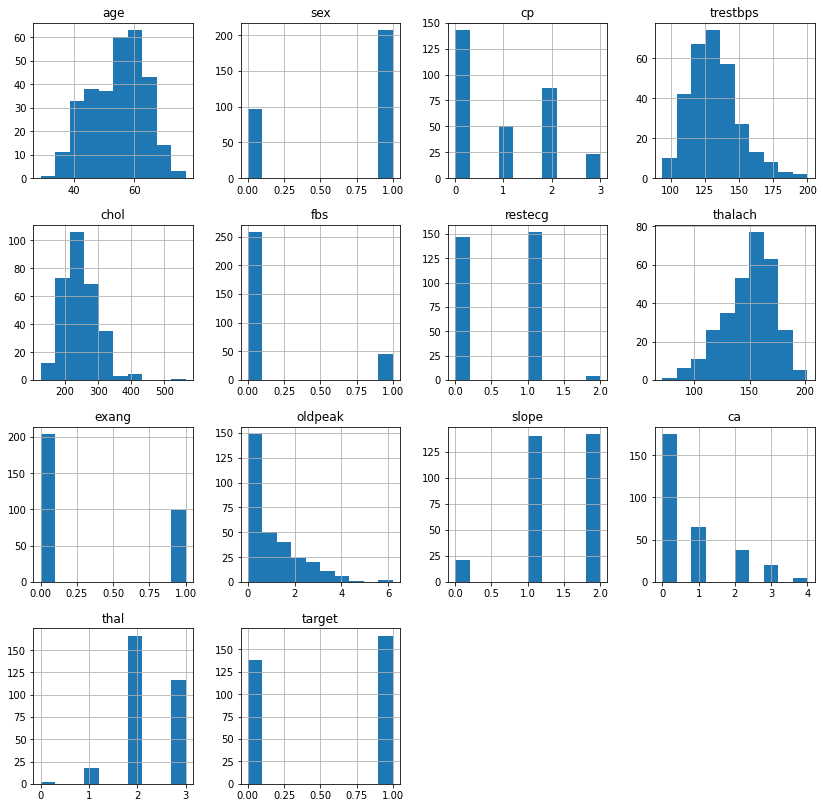

In [ ]:
# using figsize=(14,14) as we have 14 columns.
heart.hist(figsize=(14,14))
plt.show()



1.   Age graph shows us that there are more people having age more than 50 in our data.

2.   Ca graph shows us that people having the problem in pulmonary veins(one of 4 major vessel) are much more than people having problem in other 3 in our data.

3. Chol graph shows that our data have more people whose serum cholestrol (mg/dl) is equal to or more than 70 mg/dl.

4. Chest Pain graph shows us that we have data of people having chest pain of type 0 i.e. typical angina, followed by 2 i.e. non-anginal, then 1 i.e. atypical angina  and least 3 i.e. asymptotatic.

5. Exang graph (which shows exercise induced angina) shows us that people who do not do exercises are almost double in number than those who do exercise.

6. Fbs graph shows us that number of  people whose fasting blood sugar  is greater than 120mg/dl are five times those who have less than 120mg/dl.

7. Oldpeak graph shows that there are more number people who have ST depression of 0mm in are data.

8. Restecg graph shows us that mostly people’s resting cardiovascular value is either 0 or  1 

9. Sex graph shows that number of men in our data is approximately the double of the number of women.
10. Slope graph shows us that number of people  whose slope of the peak exercise ST segment is either 1 or 2 are more in number while those having 0 is around 23-24 only.

11. Target graphs shows us that in our data almost 165 people are suffering from heart disease while around 130 are having healthy heart.

12. Thal graph shows us that our data compromises of most of the people whose thal is fixed defect or reversable defect.

13. Thalach graph shows that the heartbeat rate of around 80 people is 150(which is most common) and people having very low and very heartrate are very less in number.

14. Trestbps graph shows us that most common resting blood pressure is between 110 to 150 .




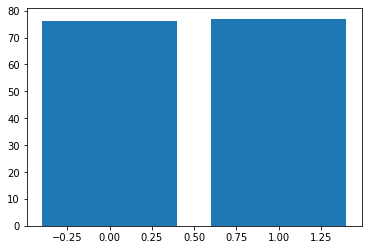

In [ ]:
# Plt.bar() is used to give us bar graph and we specify x axis as sex and y axis as age.
plt.bar(x = heart['sex'], height = heart['age'])
plt.show()

Above graph tells us that the age of both the males and females whose data is included in our list is almost same i.e. around 75.


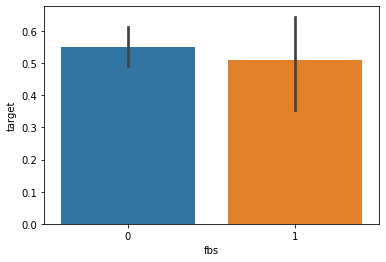

In [ ]:
# Sns.barplot() or seaborn.barplot() is also used to give us a barplot 
# diagram along with a line in middle of each box which represents the 
# STD(standard deviation) of that particular column.
sns.barplot(x="fbs",y="target",data=heart)
plt.show()

Above graph shows us that  people whose fasting blood sugar is greater than 120 mg/dl these people have heart disease

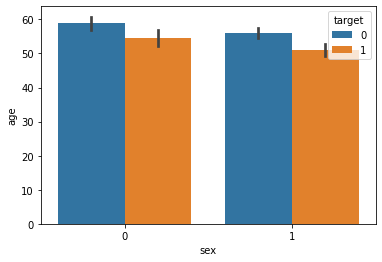

In [ ]:
# Here we have also used “hue” by the help of which we can analyse the data of more than one thing.
# Like here we analyse sex and age of both male and female in a single graph using hue.
sns.barplot(x=heart['sex'],y=heart['age'],hue=heart['target'])
plt.show()

This graph shows us that among females, the ones who are not having heart disease are more than 55 years old while those who are suffering are around 55 years old. If we talk about males, the one who are not suffering from heart disease are around 56 years old while those suffering are around 50 year old.

Overall those suffering are younger than the those who are 
not suffering from heart disease. Moreover males suffering are also younger than the females.





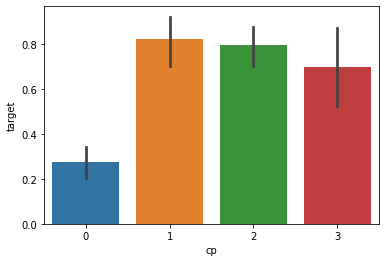

In [ ]:
# Now we are having chest pain on x axis and target on y axis
sns.barplot(x=heart['cp'],y=heart['target'])
plt.show()

This graph tells us that of people who having chest pain type 0 are having around 30% chances of having an heart problem, those who have chest pain 1,2 and 3 are likely to have more chances of having an heart problem(around 82%, 80% and 75% respectivey).


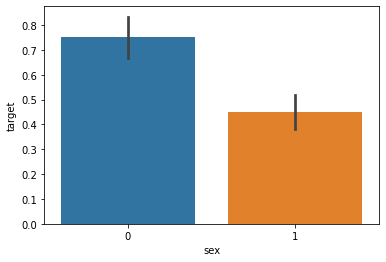

In [ ]:
sns.barplot(x=heart['sex'],y=heart['target'])
plt.show()

This graph shows us that females are more prone to heart disease in comparison to men.


In [ ]:
# Px.bar() is an another bar graph making function 
# but it represents every column as different by having liitile breaks and 
# those whose value are same are placed over each other.
# When several rows share the same value of x (here Female or Male), 
# the rectangles are stacked on top of one another by default.
px.bar(heart,heart['sex'],heart['target'])

This graph shows us that 70% of the women are likely to be suffering from heart disease while 93% men are having heart disease.


In [ ]:
# The distplot() [Distribution Plot] figure factory displays a combination of statistical
#  representations of numerical data, such as histogram, kernel density estimation or
#  normal curve, and rug plot. Rug plot is normally off. 
# We can also turn off any of rde or hist by inputting their value equals to false.

The distplot can be composed of all or any combination of the following 3 components −histogram, curve: (a) kernel density estimation or (b) normal curve, and  rug plot.
Here we have taken the output of thal column 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



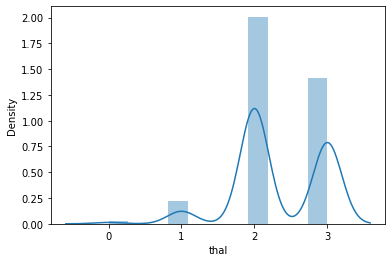

In [ ]:
sns.distplot(heart['thal'])

In this graph x axis depects the type of thal defect and y column represents the 0 to 2(scale of defects).  Boxes showing its value 0,1,2,3 by bargraph and its density is shown by curve. We got to know that most have 2 type of defect.

**Now we have choosen the chol column for the same as above.**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



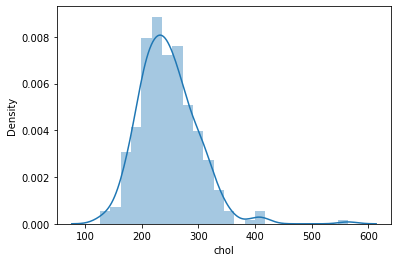

In [ ]:
sns.distplot(heart['chol'])

This graph shows the serum cholestral high peak 

In [ ]:
# Now we have defined another variable which comprises of 5 columns, 
# namely trestbps, chol, thalach, age and oldspeak.
numeric_coloumns = ['trestbps','chol','thalach','age','oldpeak']

Then we made the bar graph using these numeric values only, so there will be 25 graphs in total(one time each at y axis and other at x axis). Both x and y axis represent number of people in that category.


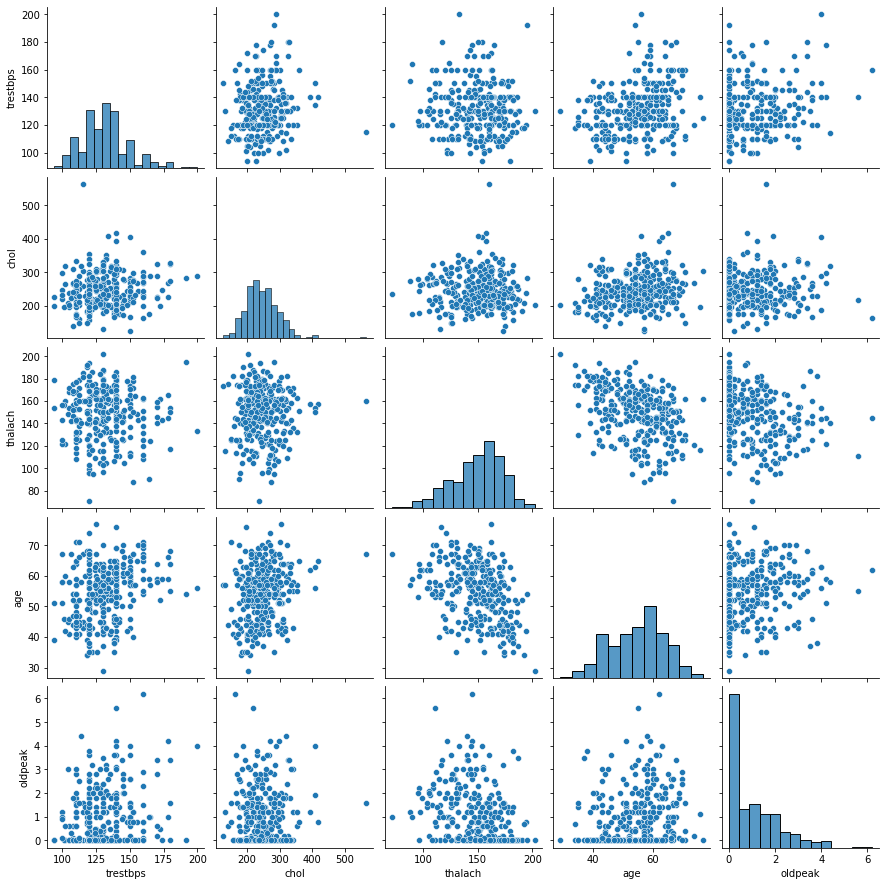

In [ ]:
sns.pairplot(heart[numeric_coloumns])

**Here we have trestbps at y axis-**
1. Trestbps vs Trestbps 
2. Chol vs Trestbps
3. Thalach vs Trestbps
4. Age vs Trestbps
5. Oldpeak  vs Trestbps

**Here we have Chol at y axis-**
1. Trestbps  vs Chol
2. Chol vs Chol
3. Thalach vs Chol
4. Age vs Chol
5. Oldpeak vs Chol

**Here we have thalach at y axis-**
1. Trestbps  vs Thalach
2. Chol vs Thalach
3. Thalach  vs Thalach
4. Age vs Thalach
5. Oldpeak vs Thalach
**Here we have age at y axis-**
1. Trestbps  vs Age
2. Chol vs Age
3. Thalach vs Age
4. Age vs Age
5. Oldpeak vs Age
**Here we have Oldpeak at y axis-**
1. Trestbps  vs Oldpeak
2. Chol vs Oldpeak
3. Thalach vs Oldpeak
4. Age vs Oldpeak
5. Oldpeak vs Oldpeak




**Below we have taken the output for the whole target column.**

In [ ]:
heart['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

**countplot()** method is used to Show the counts of observations in each categorical bin using bars.

Firstly we have put the variable value of y to target column. We then use sns.countplot to know the counts of data of column target and print the count graph.


1    165
0    138
Name: target, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



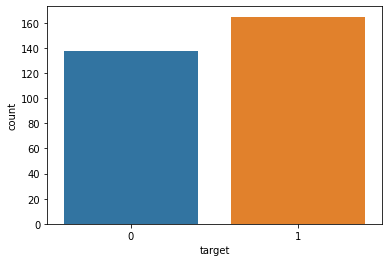

In [ ]:
y=heart["target"]
sns.countplot(y)
target_temp = heart.target.value_counts()
print(target_temp)

Here count(i.e. number of people) is at y axis and target (either 0 or 1) is at x axis.
We can analyse from the given graph that people who are having heart disease are more in number then those not having.


**Sns.heatmap()** is used to make a heatmap graph.

A heat map (or heatmap) is a graphical representation of data where the individual values contained in a matrix are represented as colors. The primary purpose of Heat Maps is to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most.


We took only few columns that we have stored in numeric columns.


Corr() is to show the corelation.
Cmap is to specify the type of heat map. Here we have specified to “terrain” type.


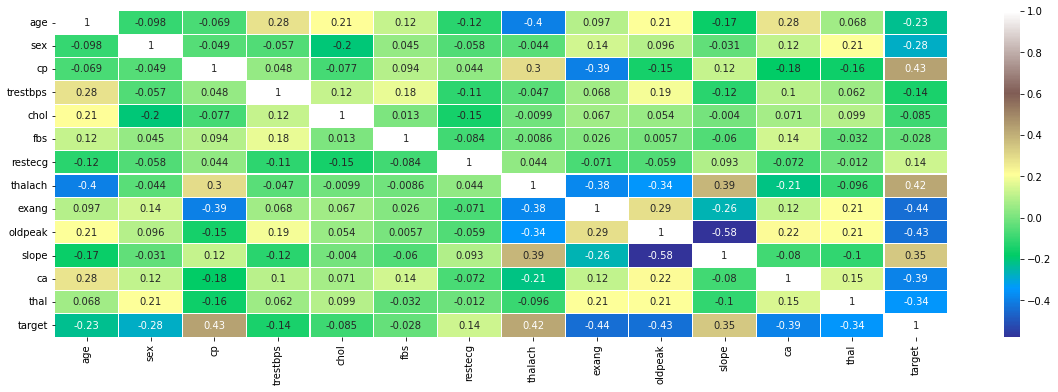

In [ ]:
sns.heatmap(heart.corr(),annot=True,cmap='terrain',linewidths=0.1)
fig = plt.gcf()
fig.set_size_inches(20,6)
plt.show()

With the help of heatmap we are showing the relation between different columns i.e. how they are corelated.
A dark color represents strongly corelation while a light color represent weak corelation.

**+ve Value:** These specify that if one thing goes up or down, the other corelated will variate also up and down according to how strong or weak they are corelated.

Here trestbps and chol, trestbps and age, trestbps and oldpeak,chol and age, chol and oldpeak, age and oldpeak are having +ve corelation.




**-ve Value:** These specify that if one thing goes up or down, the other corelated will variate oppositely   to the prior one according to how strong or weak they are corelate.


Here trestbps and thalach, chol and thalach, thalach and oldpeak, thalach and age are having -ve corelation.


Now we are making distplot again for age and thalach against target.

**Subplot():** The matplotlib.pyplot.subplots method provides a way to plot multiple plots on a single figure.


First we specify size of each figure is 12X10.

Sublpot(221) specifies that we have 2 column and 2 rows, 1 is that this is the first figure.

Sublpot(222) specifies that we have 2 column and 2 rows, 2 is that this is the second figure.

Sublpot(223) specifies that we have 2 column and 2 rows, 3 is that this is the third figure.

Sublpot(224) specifies that we have 2 column and 2 rows, 4 is that this is the fourth figure.


In [ ]:
#create four displots

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

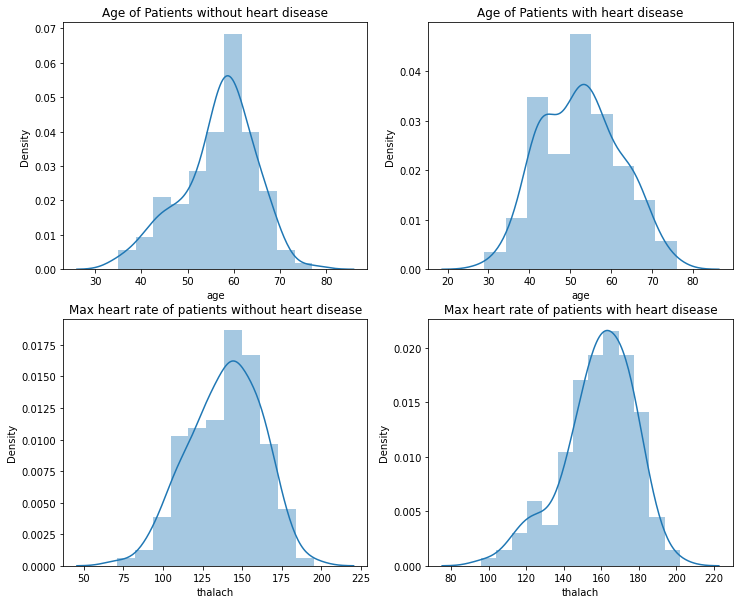

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(heart[heart['target']==0].age)
plt.title('Age of Patients without heart disease')
plt.subplot(222)
sns.distplot(heart[heart['target']==1].age)
plt.title('Age of Patients with heart disease')
plt.subplot(223)
sns.distplot(heart[heart['target']==0].thalach)
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(heart[heart['target']==1].thalach)
plt.title('Max heart rate of patients with heart disease')
plt.show()

Age:-

*   With heart disease: Highest intensity is between 40 and 60 in this category.

*  Without heart disease: Highest intensity is at 60 in this category. 


Thalach:-


*   Without heart disease: Highest intensity is at 150 in this category.
*   With heart disease: Highest intensity is at 170 in this category.



                                                                

Now we will anaylise the data using violin plot and swarm plot.


**Violinplot()-** Violin plots are similar to box plots, except that they also show the probability density of the data at different values. Violin plots will include a marker for the median of the data and a box indicating the interquartile range, as in standard box plots. Overlaid on this box plot is a kernel density estimation. Like box plots, violin plots are used to represent comparison of a variable distribution (or sample distribution) across different "categories".


**Swarmplot()-** A swarm plot is very similar to a strip plot, yet the locations of points are adjusted automatically to avoid overlap even if the jitter value is not applied. These plots resemble bees swarming . Its just like violin plot but without any axis or boundary.


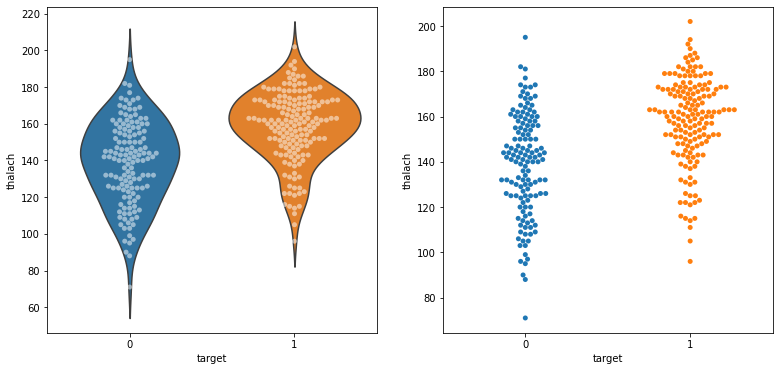

In [ ]:
plt.figure(figsize = (13,6))
plt.subplot(121)
sns.violinplot(x="target",y="thalach",data= heart,inner=None)
sns.swarmplot(x="target",y="thalach",data= heart,color='w',alpha=0.5)

plt.subplot(122)
sns.swarmplot(x="target",y="thalach",data= heart)
plt.show()

**Both the plots represents the same thing:**



*   People who don’t have a heart disease(represented by 0) are having their thalach value almost below 170. Most of them having it at around 140.
*   People who have a heart disease(represented by 1) are having their thalach value almost below 190. Most of them having it at around 180.




Here we have again printed our whole data.


In [ ]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


We can make any number of different types of graphs using subplot. Here we have made 3 different types as you can see below.

**Point plot()-** A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars. It is important to keep in mind that a point plot shows only the mean (or other estimator) value.

**.legend()-** A legend is an area describing the elements of the graph. In the matplotlib library, there’s a function called **legend()** which is used to Place a legend on the axes.


**Bar plot-** A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. 

**Count plot-** A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, … n) on the relevant axis, even when the data has a numeric or date type.



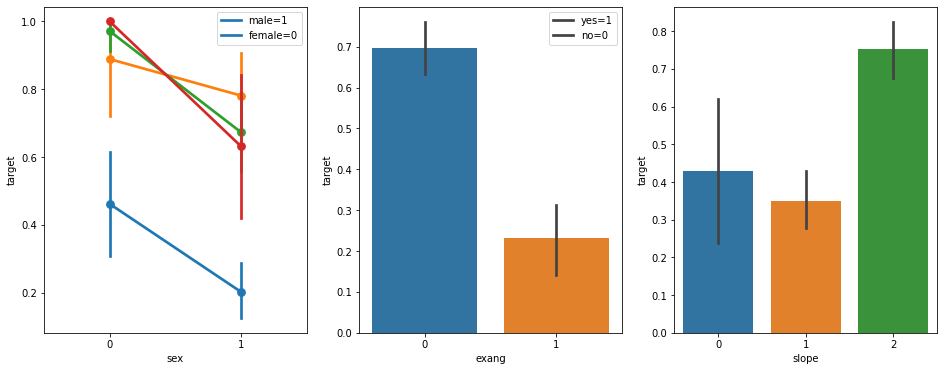

In [ ]:
#create pair plot and two bar plots
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex",y="target",hue='cp',data=heart)
plt.legend(['male=1','female=0'])
plt.subplot(132)
sns.barplot(x="exang",y="target",data= heart)
plt.legend(['yes=1','no=0'])
plt.subplot(133)
sns.barplot(x="slope",y="target",data= heart)
plt.show()

First graph is between sex and four types of cp. Each color represent different cp. There is a line which joins the mean of target value for both male and female to each other.

Figure 2 shows that who have exercised induced againa are not as much prone to heart disease as to the other.


Graph 3 shows that people have less chances of developing heart disease if their slope of the peak   exercise ST segment is 0. But if their value is 2, they must be having the heart disease.

In [ ]:
#data processing

Here is a comment saying that now we will be doing things with the data processing.

Data processing is, generally, "the collection and manipulation of items of data to produce meaningful information." In this sense it can be considered a subset of information processing, "the change of information in any manner detectable by an observer."

**value_counts()** function return a Series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.

In [ ]:
heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

We can se that there are 165 people in our data who are suffering from heart disease while there are 138 people who have a healthy heart right now.

**isnull()** function detect missing values in the given series object. It return a boolean same-sized object indicating if the values are NA. Missing values gets mapped to True and non-missing value gets mapped to False .

In [ ]:
heart['target'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: target, Length: 303, dtype: bool

Every value’s result is false which indicates there is no missing value in this column.

**.sum()** results in the summation of every numerical value in the required column.


In [ ]:
heart['target'].sum()

165

As there is only 0s and 1s in target column, so this result also show the number of people suffering from heart disease in our data.

**.unique() :-** This function returns an array of unique elements in the **input array**

In [ ]:
heart['target'].unique()

array([1, 0])

The result shows that there are only 0s and 1s in this column.


In [ ]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Here we have taken the sum of the “heart.isnull()”


All the results is zero indication that the null() function had resulted in 0 i.e. no missing data in our information

**.loc()-** Access a group of rows and columns by label(s) or a boolean **array**. **.loc()** is primarily label based, but may also be used with a **boolean array**.


In [ ]:
#storing in x & y

In [ ]:
x,y=heart.loc[:,:'thal'],heart.loc[:,'target']

Using loc() function we stored the columns till thal in a variable named x and target in y.


In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


We have printed variable x.


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

Here we have printed variable y


In [ ]:
###or x,y=heart.iloc[:,:-1],heart.loc[:,:-1]

Above is a comment showing we would also use the function iloc() for assigning columns to x and y. In iloc() function we uses index.


**.shape-** The function "shape" returns the shape of an array. The shape is a tuple of integers. These numbers denote the lengths of the corresponding array dimension.


In [ ]:
x.shape

(303, 13)

In [ ]:
y.shape

(303,)

So we got to know that x has 303 rows and 13 columns while y have 303 rows and 1 column.

**train_test_split** is a function in **Sklearn** model selection for splitting data arrays into two subsets: for training data and for testing data. With this function, you don't need to divide the dataset manually. By default, Sklearn **train_test_split** will make random partitions for the two subsets.


The **StandardScaler** assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a **standard deviation of 1**.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Here we split the data into train and test because if use all the data developing the model, it will know the data and then while checking the accuracy it will be of no use in that.

We will be using train data for building the module and test data for measuring the accuracy.


**.drop()-** The drop() function is used to **drop** specified labels from rows or columns. **Remove** rows or columns by specifying label names and corresponding axis, or by specifying directly index or column names.

In [ ]:
x = heart.drop(['target'],axis=1)

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


We then have printed the x.


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.3,shuffle=True)

Random_state=10 means that it will shuffle for every 10 value i.e. it will not be regular.

Test_size=0.3 means that training and testing are in 70:30 proportion.


In [ ]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2


We can see above in x test that everything is shuffled.


In [ ]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In y test also everything is shuffled.


In [ ]:
print("tain_set_x shape : "+str(x_train.shape))
print("tain_set_y shape : "+str(y_train.shape))
print("test_set_x shape : "+str(x_test.shape))
print("test_set_y shape : "+str(y_test.shape))

tain_set_x shape : (212, 13)
tain_set_y shape : (212,)
test_set_x shape : (91, 13)
test_set_y shape : (91,)


Then we have printed the shape of the 4 things as can be seen above.

In [ ]:
#model

In [ ]:
#decisiontree classifier

Now we are going to make a model named decision tree classifier. The same is written in the comment of the code.

Before making the model we have made a variable called category and stored two messages, one for those who have a heart disease and one for those who don’t have it.

**Lets first discuss something about classification:-**

Classification is a two-step process, learning step and prediction step. In the learning step, the model is developed based on given training data. In the prediction step, the model is used to predict the response for given data.

In [ ]:
Category = ['No........You do not have Heart disease','Yes.....You have Heart disease']

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.

The basic idea behind any decision tree algorithm is as follows:




1.   Select the best attribute using Attribute Selection Measures(ASM) to split the records.
2.   Make that attribute a decision node and breaks the dataset into smaller subsets.
3.   Starts tree building by repeating this process recursively for each child until one of the condition will match:

    *   All the tuples belong to the same attribute value.
    *   There are no more remaining attributes.
    *   There are no more instances.






**.fit()-** The **fit()** method takes the training data as arguments, which can be one array in the case of unsupervised learning, or two arrays in the case of supervised learning. Note that the model is fitted using X and y, but the object holds no reference to X and y.


It bulds the model file.

**.predict()-** This method accepts one argument and returns the label for each object in the array.


**Accuracy_score-** In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.


In [ ]:
prediction = dt.predict(x_test)
accuracy_dt=accuracy_score(y_test,prediction)*100

We have then printed the accuracy for this model.


In [ ]:
accuracy_dt

72.52747252747253

We are getting an accuracy around 72.53 which is considered a good result.


**.format()-** The format() method formats the specified value(s) and insert them inside the string's placeholder.

In [ ]:
print("Accuracy on training set : {:.3f}".format(dt.score(x_train,y_train)))
print("Accuracy on testing set : {:.3f}".format(dt.score(x_test,y_test)))

Accuracy on training set : 1.000
Accuracy on testing set : 0.769


We can see accuracy on training set is 1 as we are taking initial data from there only and we already have seen the accuracy for test set.

In [ ]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

Here we have printed y_test to compare it with the prediction.


In [ ]:
prediction

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0])

We can compare our prediction with the actual value of target column.

**Now we will see the working of our model.**

Then we have input the value of one complete row using an array.


In [ ]:
x_DT = np.array([[63,1,3,145,233,1,0,150,0,.3,0,0,1]])
x_DT_prediction = dt.predict(x_DT)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



Here we have used the prediction function on our input to find whether this person is suffering from heart disease or not

In [ ]:
x_DT_prediction[0]

1

In [ ]:
print(Category[int(x_DT_prediction[0])])

Yes.....You have Heart disease


As we can see the output is 1 i.e. he/she is suffering from heart disease, we printed our stored message in category for this result.


Below are some more results from our working model.


In [ ]:
x_DT_1 = np.array([[57,0,0,120,354,0,1,163,1,0.6,2,0,2]])
x_DT_prediction = dt.predict(x_DT_1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
x_DT_prediction[0]

1

In [ ]:
print(Category[int(x_DT_prediction[0])])

Yes.....You have Heart disease


This person is also suffering from heart disease.

In [ ]:
x_DT_2 = np.array([[45,1,3,110,264,0,1,132,0,1.2,1,0,3]])
x_DT_prediction = dt.predict(x_DT_2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
x_DT_prediction[0]

0

In [ ]:
print(Category[int(x_DT_prediction[0])])

No........You do not have Heart disease


This person is safe.


In [ ]:
x_DT_3 = np.array([[41,0,1,130,204,0,0,172,0,1.4,2,0,2]])
x_DT_prediction = dt.predict(x_DT_3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
x_DT_prediction[0]

1

In [ ]:
print(Category[int(x_DT_prediction[0])])

Yes.....You have Heart disease


In [ ]:
x_DT_4 = np.array([[57,0,1,130,236,0,0,174,0,0.0,1,1,2]])
x_DT_prediction = dt.predict(x_DT_4)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
x_DT_prediction[0]

0

In [ ]:
print(Category[int(x_DT_prediction[0])])

No........You do not have Heart disease


This person is safe.

In [ ]:
x_DT_5 = np.array([[68,1,0,144,93,1,1,141,0,3.4,1,2,3]])
x_DT_prediction = dt.predict(x_DT_5)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
x_DT_prediction[0]

0

In [ ]:
print(Category[int(x_DT_prediction[0])])

No........You do not have Heart disease


This person is safe.

In [ ]:
x_DT_6 = np.array([[56,1,1,120,236,0,1,178,0,0.8,2,0,2]])
x_DT_prediction = dt.predict(x_DT_6)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
x_DT_prediction[0]

1

In [ ]:
print(Category[int(x_DT_prediction[0])])

Yes.....You have Heart disease


This person is also suffering from heart disease.


We will now be seeing feature importance of our decision tree:

In [ ]:
# Feature Importance in decision tree

In [ ]:
print("Feature Importances:\n{}".format(dt.feature_importances_))

Feature Importances:
[0.07003958 0.0283698  0.32392476 0.08121132 0.07033834 0.
 0.         0.08199351 0.04724994 0.06034607 0.1088383  0.10975468
 0.01793368]


Here we have printed the feature imprtances.

Now we will be plotting a bar graph for our model.

**barh()** function in axes module of matplotlib library is used to make a horizontal bar plot. 

**Yticks()-**  is for y axis.
Xlabel() and ylabel()  functions are used to give names to x and y axis respectively.

**.ylim()-** This command allow you to either zoom or expand the plot or to set the y axis ranges to include important values (such as the origin).


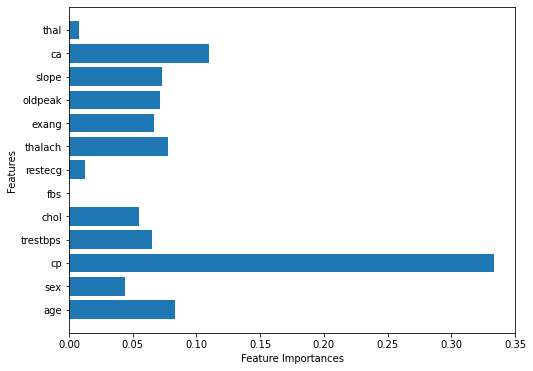

In [ ]:
def plot_feature_importances_disiases(model):
  plt.figure(figsize=(8,6))
  n_features=13
  plt.barh(range(n_features),model.feature_importances_,align='center')
  plt.yticks(np.arange(n_features),x)
  plt.xlabel("Feature Importances")
  plt.ylabel("Features")
  plt.ylim(-1,n_features)
plot_feature_importances_disiases(dt)
plt.savefig('feature_importances')
plt.show()

We can see that in predicting whether a person have heart disease or not, cp i.e. chest pain is the most important feature while fbs(fasting blood sugar) is the least important.

**Now we will make another model using KNN algorithm.**

In [ ]:
#KNN

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition.

**Working of KNN Algorithm**

K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set. We can understand its working with the help of following steps −

**Step 1 −** For implementing any algorithm, we need dataset. So during the first step of KNN, we must load the training as well as test data.

**Step 2 −** Next, we need to choose the value of K i.e. the nearest data points. K can be any integer.

**Step 3 −** For each point in the test data do the following −

*   **3.1 −** Calculate the distance between test data and each row of training data with the help of any of the method namely: Euclidean, Manhattan or Hamming distance. The most commonly used method to calculate distance is Euclidean.
*   **3.2 −** Now, based on the distance value, sort them in ascending order.
*   **3.3 −** Next, it will choose the top K rows from the sorted array.
*   **3.4 −** Now, it will assign a class to the test point based on most frequent class of these rows.

**Step 4 –** End








**Standardscalar()-**StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. ... StandardScaler makes the mean of the distribution 0. About 68% of the values will lie be between -1 and 1. It also calculates and give result in a single unit.

**Transform()-** Python’s Transform function returns a self-produced dataframe with transformed values after applying the function specified in its parameter. This dataframe has the same length as the passed dataframe.


In [ ]:
sc = StandardScaler().fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

Then we have printed  x_test_std

In [ ]:
x_test_std

array([[ 0.18111199, -1.35154233, -0.97043553, ..., -0.6067969 ,
         1.33369489,  1.22676132],
       [ 0.39865161,  0.73989544,  0.97963397, ..., -0.6067969 ,
         0.33105902,  1.22676132],
       [ 1.05127045,  0.73989544,  0.97963397, ..., -0.6067969 ,
        -0.67157686,  1.22676132],
       ...,
       [ 0.2898818 ,  0.73989544,  0.97963397, ..., -0.6067969 ,
         0.33105902,  1.22676132],
       [-0.25396724,  0.73989544,  0.00459922, ...,  0.98136289,
        -0.67157686, -0.41927286],
       [ 0.61619122,  0.73989544, -0.97043553, ..., -0.6067969 ,
         1.33369489,  1.22676132]])

Then we have imported KNeighborsClassifier for developing the model.


We have choose n_naighbor= 4 as in further code will be getting that fourth was the highest


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train_std,y_train)

KNeighborsClassifier(n_neighbors=4)

We used fit for building the model.

Then we have found the accuracy for this model.


In [ ]:
prediction_knn = knn.predict(x_test_std)
accuracy_knn = accuracy_score(y_test,prediction_knn)*100

In [ ]:
accuracy_knn

84.61538461538461

We can see that it’s accuracy value is greater than the previous model so it is better.


In [ ]:
print("Accuracy on training set: {:.3f}".format(knn.score(x_train,y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(x_test,y_test)))

Accuracy on training set: 0.373
Accuracy on test set: 0.516


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



Above we can see the KNN model accuracy on both training and testing set.

**.range()-** The range() function returns a sequence of numbers, starting from 0 by default, and increments by 1 (by default), and stops before a specified number.
Here we have inputted range till 26 as  we have 23 numeric columns.

**.append()-** The append() method in python adds a single item to the existing list. It doesn't return a new list of items but will modify the original list by adding the item to the end of the list. After executing the method append on the list the size of the list increases by on

In [ ]:
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train_std,y_train)
  prediction_knn = knn.predict(x_test_std)
  scores[k] = accuracy_score(y_test,prediction_knn)
  scores_list.append(accuracy_score(y_test,prediction_knn))

Then using for loop, we have stored value as can be seen above in many variables.

We printed the score then.


In [ ]:
scores

{1: 0.7692307692307693,
 2: 0.8241758241758241,
 3: 0.8241758241758241,
 4: 0.8461538461538461,
 5: 0.8131868131868132,
 6: 0.8131868131868132,
 7: 0.8131868131868132,
 8: 0.8351648351648352,
 9: 0.7802197802197802,
 10: 0.7912087912087912,
 11: 0.7912087912087912,
 12: 0.7802197802197802,
 13: 0.7912087912087912,
 14: 0.8021978021978022,
 15: 0.7802197802197802,
 16: 0.7912087912087912,
 17: 0.7802197802197802,
 18: 0.7802197802197802,
 19: 0.7692307692307693,
 20: 0.7802197802197802,
 21: 0.7802197802197802,
 22: 0.7802197802197802,
 23: 0.7802197802197802,
 24: 0.7802197802197802,
 25: 0.7802197802197802}

As You can see that highest score is o.84….. at 4th position that’s y I had written 4 their.

If you put something else there, the results will be different.

Because these are the relation set value using prediction and we needed highest from these.


Now we have make line graph k range and score list to analyse theses easily.

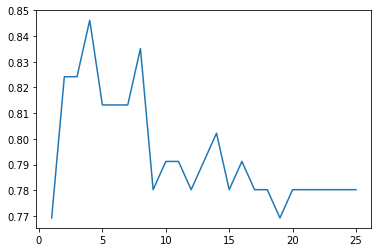

In [ ]:
plt.plot(k_range,scores_list)

This line graph shows us that lowest value is around 76.9……something and highest is around 84.5…..


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



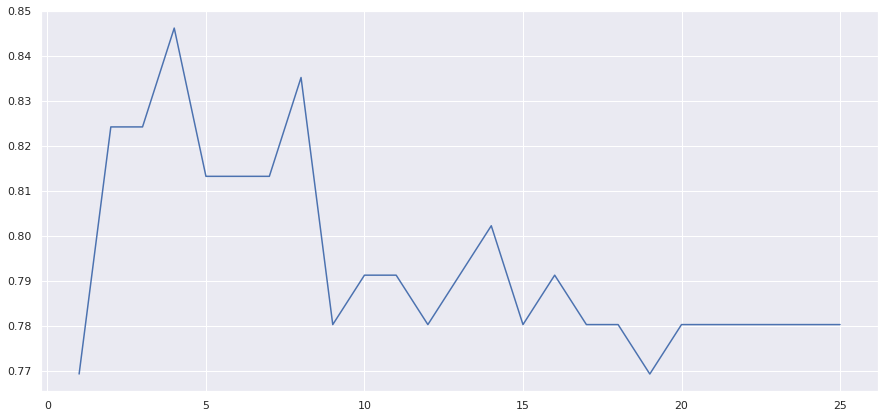

In [ ]:
sns.lineplot(k_range,scores_list)

It shows us the same result but with more clearity.


**Now we will implement our knn model**

In [ ]:
x_knn = np.array([[63,1,3,145,233,1,0,150,0,.3,0,0,1]])
x_knn_std = sc.transform(x_knn)
x_knn_prediction = dt.predict(x_knn) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
x_knn_std

array([[ 0.94250064,  0.73989544,  1.95466871,  0.75961822, -0.30064937,
         2.37170825, -0.9841849 ,  0.01848325, -0.6723502 , -0.60140183,
        -2.1949567 , -0.67157686, -2.06530703]])

In [ ]:
x_knn_prediction[0]

1

In [ ]:
print(Category[int(x_knn_prediction[0])])

Yes.....You have Heart disease


We first give all the details of a single person. Then convert this info in same unit and then predict the outcome according to the algorithm of KNN.

This person is suffering from heart disease.

Below are some more implementations of KNN.


In [ ]:
x_knn_1 = np.array([[56,1,1,120,236,0,1,178,0,0.8,2,0,2]])
x_knn_std = sc.transform(x_knn_1)
x_knn_prediction = dt.predict(x_knn_1) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
x_knn_std

array([[ 0.18111199,  0.73989544,  0.00459922, -0.6102275 , -0.24493463,
        -0.42163702,  0.91260782,  1.22415971, -0.6723502 , -0.17441862,
         0.98136289, -0.67157686, -0.41927286]])

In [ ]:
x_knn_prediction[0]

1

In [ ]:
print(Category[int(x_knn_prediction[0])])

Yes.....You have Heart disease


This person is also suffering from heart disease.


In [ ]:
x_knn_2 = np.array([[68,1,0,144,93,1,1,141,0,3.4,1,2,3]])
x_knn_std = sc.transform(x_knn_2)
x_knn_prediction = dt.predict(x_knn_2) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
x_knn_std

array([[ 1.48634968,  0.73989544, -0.97043553,  0.70482439, -2.90067074,
         2.37170825,  0.91260782, -0.36905562, -0.6723502 ,  2.0458941 ,
        -0.6067969 ,  1.33369489,  1.22676132]])

In [ ]:
x_knn_prediction[0]

0

In [ ]:
print(Category[int(x_knn_prediction[0])])

No........You do not have Heart disease


This person is not suffering from heart disease.

In [ ]:
x_knn_3 = np.array([[41,0,1,130,204,0,0,172,0,1.4,2,0,2]])
x_knn_std = sc.transform(x_knn_3)
x_knn_prediction = dt.predict(x_knn_3) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
x_knn_std

array([[-1.45043512, -1.35154233,  0.00459922, -0.06228921, -0.83922523,
        -0.42163702, -0.9841849 ,  0.96580047, -0.6723502 ,  0.33796124,
         0.98136289, -0.67157686, -0.41927286]])

In [ ]:
x_knn_prediction[0]

1

In [ ]:
print(Category[int(x_knn_prediction[0])])

Yes.....You have Heart disease


This person is also suffering from heart disease.

In [ ]:
x_knn_4 = np.array([[57,0,0,120,354,0,1,163,1,0.6,2,0,2]])
x_knn_std = sc.transform(x_knn_4)
x_knn_prediction = dt.predict(x_knn_4)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
x_knn_std

array([[ 0.2898818 , -1.35154233, -0.97043553, -0.6102275 ,  1.94651195,
        -0.42163702,  0.91260782,  0.57826161,  1.48732014, -0.3452119 ,
         0.98136289, -0.67157686, -0.41927286]])

In [ ]:
x_knn_prediction[0]

1

In [ ]:
print(Category[int(x_knn_prediction[0])])

Yes.....You have Heart disease


This person is also suffering from heart disease.

In [ ]:
x_knn_5 = np.array([[57,0,1,130,236,0,0,174,0,0.0,1,1,2]])
x_knn_std = sc.transform(x_knn_5)
x_knn_prediction = dt.predict(x_knn_5)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
x_knn_std

array([[ 0.2898818 , -1.35154233,  0.00459922, -0.06228921, -0.24493463,
        -0.42163702, -0.9841849 ,  1.05192022, -0.6723502 , -0.85759176,
        -0.6067969 ,  0.33105902, -0.41927286]])

In [ ]:
x_knn_prediction[0]

0

In [ ]:
print(Category[int(x_knn_prediction[0])])

No........You do not have Heart disease


This person is not suffering from heart disease.


Here we are storing some values in variable named alhorithm and scores.


In [ ]:
algorithms1 = ["Decision Tree","KNN"]
scores = [accuracy_dt,accuracy_knn]

Now we have plot a graph for Decision Tree and KNN

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



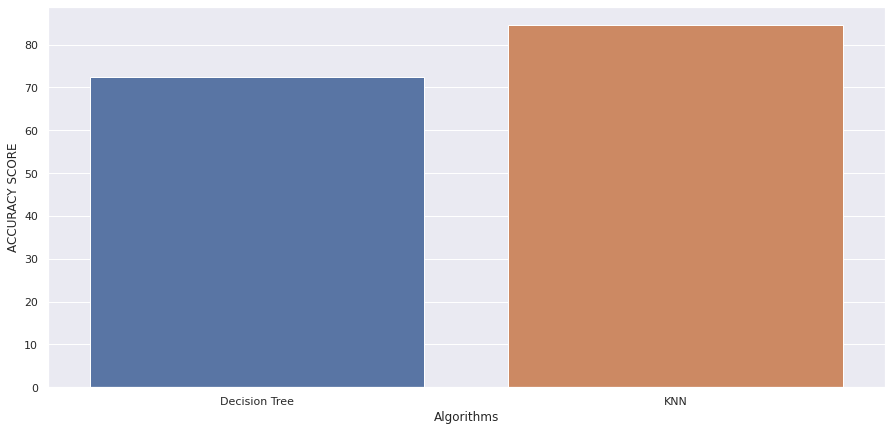

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("ACCURACY SCORE")
sns.barplot(algorithms1,scores)

We can clearly see from the graph that KNN is more accurate than Decision Tree.


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
model = XGBClassifier()

In [ ]:
model.fit(x_train,y_train)

XGBClassifier()

In [ ]:
# predict the target on the train dataset
predict_train = model.predict(x_train)
print('\nTarget on train data',predict_train)


Target on train data [1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0
 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1
 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1
 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1
 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0]


In [ ]:
predict_test = model.predict(x_test)
print('\nTarget on test data',predict_test)


Target on test data [0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1
 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0]


In [ ]:
accuracy_xg = accuracy_score(y_test,predict_test)*100
print('\naccuracy_score on train dataset : ', accuracy_xg)


accuracy_score on train dataset :  78.02197802197803


In [ ]:
x_xg = np.array([[63,1,3,145,233,1,0,150,0,.3,0,0,1]])
x_xg_prediction = dt.predict(x_xg)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
x_xg_prediction[0]

1

In [ ]:
print(Category[int(x_xg_prediction[0])])

Yes.....You have Heart disease


This person is also suffering from heart disease.

In [ ]:
algorithms = ["Decision Tree","KNN","XGBOOST"]
scores = [accuracy_dt,accuracy_knn,accuracy_xg]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



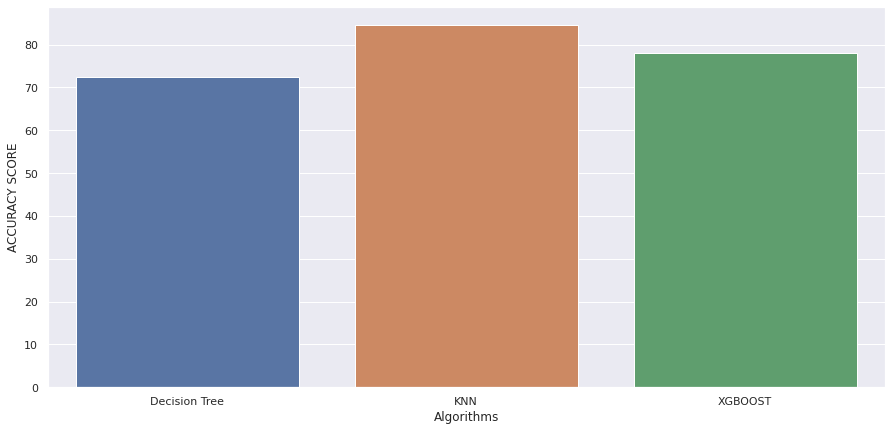

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("ACCURACY SCORE")
sns.barplot(algorithms,scores)

We can clearly see from the graph that KNN is more accurate than Decision Tree & XGBOOST.

The data used for this project is in heart.csv

For the analysis we use some of very rich python libraries like pandas, numpy, matplotlib, seaborn, plotly, sklearn, cufflinks, etc.

We analysed how many given phrases related to our body are corelated whether we have heart disease or not.

  * Age As age increases chances of having heart diseases increases
  *  male, female Men have more heart diseases than women
  * chest pain type 1,2,3,4 People having chest pain type 2 generally suffer from heart disease 
  * resting blood pressure Blood pressure must be normal. Both low and high can be a sign of heart disease
  * serum cholestrol in mg/dl  This must be less as otherwise it will indicating a high chance of having a heart disease
  * fasting blood sugar > 120mg/dl People whose fbs is high are more likely to have a heart disease
  * resting cardiographic results (values 0,1,2)
  * maximum heart rate achieved Its high value indicate bad heart
  * exercise induced angina People whose this is less are more likely to have a heart disease
  * ST depression induced by exercise relative to rest People whose this value is close to 1 are having a heart disease
  * the slope of the peak exercise ST segment If its value is 2, they must be          having the heart disease.

  * number of major vessels (0-3) colored by flourosopy It depends largely on person to person to realate it with heart disease.
  * thal It is not much a fixed variation with having or not having a heart disease

KNN model have more accuracy than Decision Tree model & XGBOOST .